# Making RDFs

This notebook demonstrates how to build an intermolecular RDF using tools built upon MDAnalysis.

Requirements:
 - MDAnalysis version 0.10.0
 - numpy

In [1]:
# Imports of required packages
from rdftool import InterRDF
import MDAnalysis as mda
%matplotlib inline
import matplotlib.pyplot as plt

Firstly, let's load up a Universe and inspect what we have in our system.  The test system here is a single frame of octanol.

In [2]:
u = mda.Universe('conf.gro')
print u
print len(u.trajectory)
print set(u.atoms.names())
print set(u.atoms.types())

<Universe with 13824 atoms>
1
set(['HH3', 'HH2', 'HH1', 'HO', 'HC2', 'HC1', 'HE1', 'HE2', 'HG2', 'HG1', 'HA1', 'HA2', 'CH', 'CC', 'CB', 'CA', 'CG', 'CF', 'CE', 'CD', 'HD2', 'HD1', 'OH', 'HF1', 'HF2', 'HB1', 'HB2'])
set(['H', 'C', 'O'])


## Making selections

To make the RDF, we want to select two different species to calculate the distribution of pairwise distances between.  We will do this based upon the atom's name.

This gives us 2 AtomGroups, both with 512 atoms in.

In [3]:
oxygen = u.selectAtoms('name HO')
hydrogen = u.selectAtoms('name HO')

print len(oxygen)
print len(hydrogen)

512
512


Next we create an RDF making object, and pass it our two AtomGroup selections

In [4]:
rdf = InterRDF(oxygen, hydrogen, bins=50, range=(0.0, 12.0))

In [5]:
rdf.run()

Doing frame 0 of 0


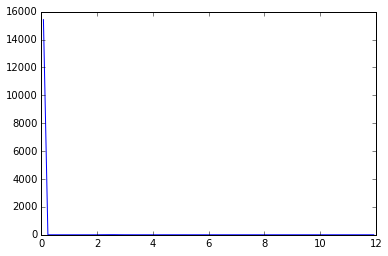

In [6]:
plt.plot(rdf.bins, rdf.rdf)

Oops, that didn't work.  We've got a single huge peak at an incredibly small distance which obscures everything.  This is caused by the OH and HO bonded pairs which are being included.

These can be excluded using the "exclusion_block" keyword.

In [7]:
rdf = InterRDF(oxygen, hydrogen, bins=50, range=(0.0, 12.0), exclusion_block=(1,1))
rdf.run()

Doing frame 0 of 0


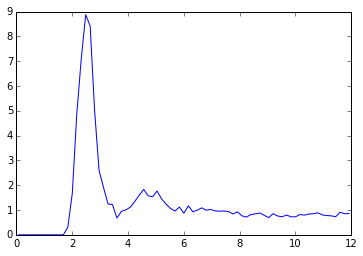

In [8]:
plt.plot(rdf.bins, rdf.rdf)